In [1]:
!python -m venv myenv
!source myenv/bin/activate

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/myenv/bin/python3

/bin/bash: line 1: myenv/bin/activate: No such file or directory


In [2]:

!pip install pandas
!pip install numpy==1.24.4
!pip install pycaret
import pandas as pd
import numpy as np


  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached pyod-2.0.1.tar.gz (163 kB)
  Preparing metadata (setup.py) ... done
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# prompt: Connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# prompt: Read sheet Consolidado from this spreadsheet: /content/drive/Shareddrives/Moura_TAD/Moura x UPE Compartilhamento/Estudo Engenharia de Processos/GM60AD - Tensões Elemento invertido.xlsm

import pandas as pd
df = pd.read_excel('/content/drive/Shareddrives/Moura_TAD/Moura x UPE Compartilhamento/Estudo Engenharia de Processos/GM60AD - Tensões Elemento invertido.xlsm', sheet_name='Consolidado')
df

,Sample,Sample Group,Step,Status,Step Time,Seconds,Miliseconds,Testing Time,Prog Time,Cycle,Cycle Level,Procedure,Voltage,Current,StdV,% of initial voltage,avg_TT
0,AM01,All,4,DCH,00:00:00.000,00:00:00,0,0,00:00:08.273,0,0,DESC800A,12.73,0.00,1.000000,1.000000,0
1,AM01,All,4,DCH,00:00:00.000,00:00:00,0,0,00:00:08.273,0,0,DESC800A,12.73,-0.02,1.000000,1.000000,0
2,AM01,All,4,DCH,00:00:00.054,00:00:00,54,54,00:00:08.327,0,0,DESC800A,6.43,-800.43,0.213483,0.505106,50
3,AM01,All,4,DCH,00:00:00.104,00:00:00,104,104,00:00:08.377,0,0,DESC800A,6.27,-800.24,0.193508,0.492537,100
4,AM01,All,4,DCH,00:00:00.151,00:00:00,151,151,00:00:08.424,0,0,DESC800A,6.18,-800.14,0.182272,0.485467,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,AM24,2nd and 4th reversed,4,DCH,00:00:04.901,00:00:04,901,4901,00:00:13.190,0,0,DESC800A,6.13,-800.00,0.003008,0.480408,4900
2492,AM24,2nd and 4th reversed,4,DCH,00:00:04.952,00:00:04,952,4952,00:00:13.241,0,0,DESC800A,6.12,-800.00,0.001504,0.479624,4950
2493,AM24,2nd and 4th reversed,4,DCH,00:00:05.004,00:00:05,4,5004,00:00:13.293,0,0,DESC800A,6.11,-800.00,0.000000,0.478840,5000
2494,AM24,2nd and 4th reversed,4,DCH,00:00:05.004,00:00:05,4,5004,00:00:13.293,0,0,DESC800A,6.11,-800.00,0.000000,0.478840,5000


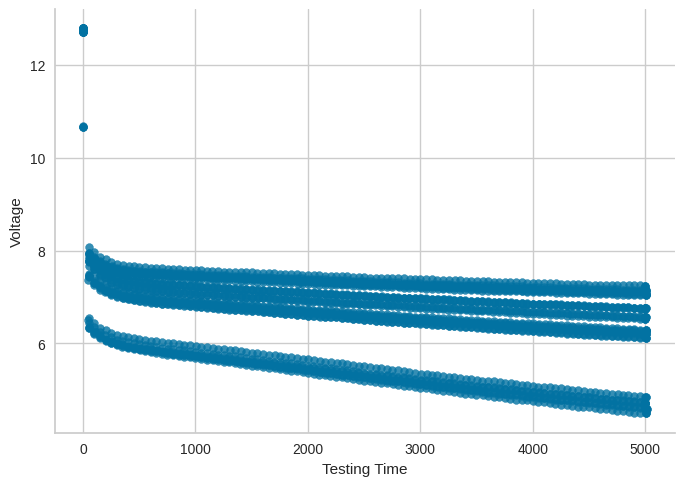

In [34]:
# @title Testing Time vs Voltage

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Testing Time', y='Voltage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
# prompt: Create a new column in df and fill it with the number of the test sample in the time series, the sample changes every time you find a value in the Miliseconds column that is lower than the previous one
'''
sample = 1
samples = []
last_time = 0

for _, row in df.iterrows():
  current_time = row['Miliseconds']
  if current_time < last_time:
    sample += 1
  samples.append(sample)
  last_time = current_time

df['Sample'] = samples
df
'''

"\nsample = 1\nsamples = []\nlast_time = 0\n\nfor _, row in df.iterrows():\n  current_time = row['Miliseconds']\n  if current_time < last_time:\n    sample += 1\n  samples.append(sample)\n  last_time = current_time\n\ndf['Sample'] = samples\ndf\n"

In [37]:
# prompt: Now create a column ms_norm and fill it with the value in column Miliseconds divided by 10, than rounded, thant multiplied by 10
'''
df['ms_norm'] = (df['Miliseconds'] / 10).round().astype(int) * 10
df
'''

"\ndf['ms_norm'] = (df['Miliseconds'] / 10).round().astype(int) * 10\ndf\n"

In [38]:
# prompt: Create a new column named class. Fill it with 0 if Sample Group is 'OK', and fill it with 1,2,3,... for the other values of Sample Group. Make sure it is the first column in the dataset.

# Create a mapping of Sample Group to class labels
class_mapping = {'OK': 0}
current_class = 1
for group in df['Sample Group'].unique():
  if group not in class_mapping:
    class_mapping[group] = current_class
    current_class += 1

# Create the 'class' column
df['class'] = df['Sample Group'].map(class_mapping)

# Reorder columns to make 'class' the first column
df = df[['class'] + [col for col in df.columns if col != 'class']]

df


,class,Sample,Sample Group,Step,Status,Step Time,Seconds,Miliseconds,Testing Time,Prog Time,Cycle,Cycle Level,Procedure,Voltage,Current,StdV,% of initial voltage,avg_TT
0,1,AM01,All,4,DCH,00:00:00.000,00:00:00,0,0,00:00:08.273,0,0,DESC800A,12.73,0.00,1.000000,1.000000,0
1,1,AM01,All,4,DCH,00:00:00.000,00:00:00,0,0,00:00:08.273,0,0,DESC800A,12.73,-0.02,1.000000,1.000000,0
2,1,AM01,All,4,DCH,00:00:00.054,00:00:00,54,54,00:00:08.327,0,0,DESC800A,6.43,-800.43,0.213483,0.505106,50
3,1,AM01,All,4,DCH,00:00:00.104,00:00:00,104,104,00:00:08.377,0,0,DESC800A,6.27,-800.24,0.193508,0.492537,100
4,1,AM01,All,4,DCH,00:00:00.151,00:00:00,151,151,00:00:08.424,0,0,DESC800A,6.18,-800.14,0.182272,0.485467,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,3,AM24,2nd and 4th reversed,4,DCH,00:00:04.901,00:00:04,901,4901,00:00:13.190,0,0,DESC800A,6.13,-800.00,0.003008,0.480408,4900
2492,3,AM24,2nd and 4th reversed,4,DCH,00:00:04.952,00:00:04,952,4952,00:00:13.241,0,0,DESC800A,6.12,-800.00,0.001504,0.479624,4950
2493,3,AM24,2nd and 4th reversed,4,DCH,00:00:05.004,00:00:05,4,5004,00:00:13.293,0,0,DESC800A,6.11,-800.00,0.000000,0.478840,5000
2494,3,AM24,2nd and 4th reversed,4,DCH,00:00:05.004,00:00:05,4,5004,00:00:13.293,0,0,DESC800A,6.11,-800.00,0.000000,0.478840,5000


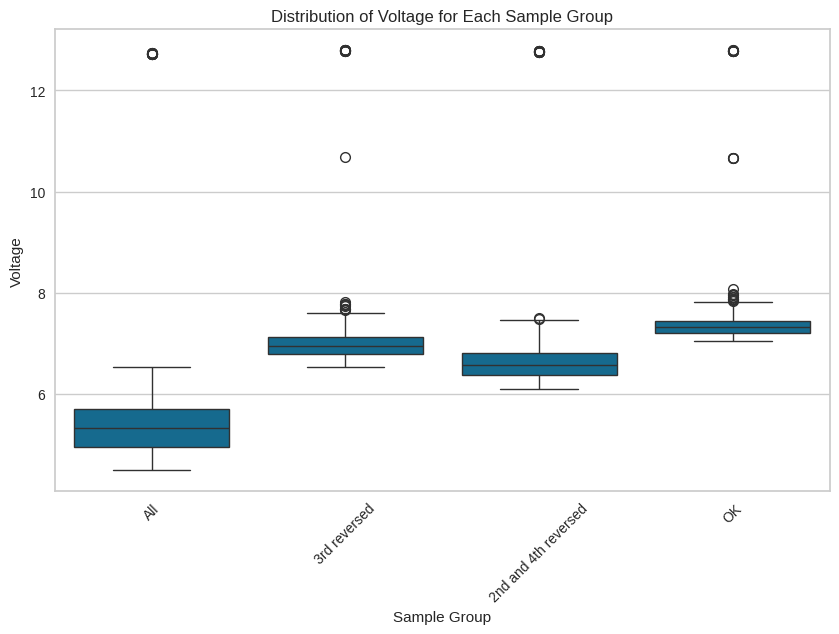

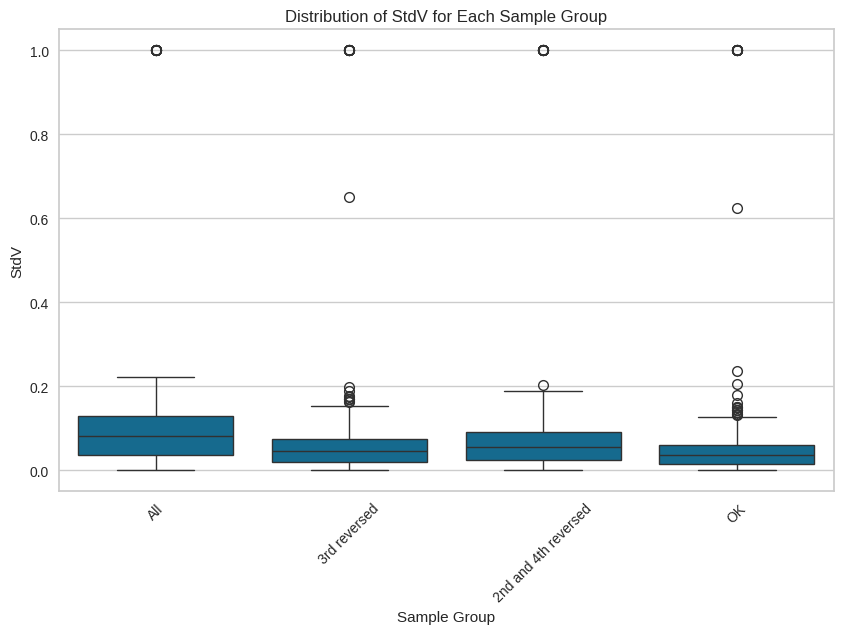

In [39]:
# prompt: Using df, plot the distributions of Voltage, and StdV, for each Sample Group

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distributions of Voltage for each Sample Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sample Group', y='Voltage', data=df)
plt.title('Distribution of Voltage for Each Sample Group')
plt.xticks(rotation=45)
plt.show()

# Plot the distributions of StdV for each Sample Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sample Group', y='StdV', data=df)
plt.title('Distribution of StdV for Each Sample Group')
plt.xticks(rotation=45)
plt.show()


In [40]:
# prompt: Using df, run a hypothesis t-test, comparing class 0 with 1, 0 with 2, 0 with 3, 1 with 2, 1 with 3, 2 with 3, print the result in text, saying if the distributions are similar or not

from scipy import stats

# Perform t-tests and print results
def compare_distributions(df, class1, class2):
  group1 = df[df['class'] == class1]['Voltage']
  group2 = df[df['class'] == class2]['Voltage']
  t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances

  if p_value < 0.05:
    print(f"The distributions of class {class1} and class {class2} are significantly different (p-value: {p_value:.3f}).")
  else:
    print(f"The distributions of class {class1} and class {class2} are not significantly different (p-value: {p_value:.3f}).")

# Compare all pairs of classes
compare_distributions(df, 0, 1)
compare_distributions(df, 0, 2)
compare_distributions(df, 0, 3)
compare_distributions(df, 1, 2)
compare_distributions(df, 1, 3)
compare_distributions(df, 2, 3)


The distributions of class 0 and class 1 are significantly different (p-value: 0.000).
The distributions of class 0 and class 2 are significantly different (p-value: 0.000).
The distributions of class 0 and class 3 are significantly different (p-value: 0.000).
The distributions of class 1 and class 2 are significantly different (p-value: 0.000).
The distributions of class 1 and class 3 are significantly different (p-value: 0.000).
The distributions of class 2 and class 3 are significantly different (p-value: 0.000).


In [48]:
# prompt: Now, create a new df, named df1, in which the column names are Sample, Sample Group, class, and the values in ms_norm. Then fill the columns whose names are the values of ms_norm with the corresponding values in column Voltage. Fill the column sample with the corresponding sample, and the column sample group, with the corresponding sample group name

import pandas as pd
# Create a list of columns for the new DataFrame
columns = ['Sample', 'Sample Group', 'class'] + df['avg_TT'].unique().tolist()

# Create the new DataFrame
df1 = pd.DataFrame(columns=columns)

# Iterate over unique samples and populate the DataFrame
rows_list = [] # create a list to hold all the rows as dictionaries
for sample in df['Sample'].unique():
  sample_data = df[df['Sample'] == sample]
  row = {
      'Sample': sample,
      'Sample Group': sample_data['Sample Group'].iloc[0],
      'class': sample_data['class'].iloc[0]
  }
  for _, row_data in sample_data.iterrows():
    row[row_data['avg_TT']] = row_data['Voltage']
  rows_list.append(row) # append the row dictionary to the list

# Concatenate all the rows into the DataFrame
df1 = pd.concat([df1, pd.DataFrame(rows_list)], ignore_index=True)

#Eliminating columns after 950
#df1 = df1.iloc[:, :df1.columns.get_loc(950)+1]

df_voltage = df1
df_voltage

,Sample,Sample Group,class,0,50,100,150,200,250,300,...,4550,4600,4650,4700,4750,4800,4850,4900,4950,5000
0,AM01,All,1,12.73,6.43,6.27,6.18,6.10,6.05,6.01,...,4.82,4.81,4.80,4.79,4.78,4.77,4.76,4.75,4.73,4.72
1,AM02,3rd reversed,2,12.79,7.78,7.67,7.58,7.50,7.45,7.41,...,6.79,6.78,6.78,6.77,6.77,6.77,6.76,6.76,6.75,6.75
2,AM03,2nd and 4th reversed,3,12.77,7.43,7.30,7.21,7.14,7.09,7.06,...,6.28,6.28,6.27,6.26,6.26,6.25,6.24,6.24,6.23,6.22
3,AM04,OK,0,12.78,7.92,7.83,7.73,7.66,7.61,7.58,...,7.10,7.09,7.09,7.09,7.08,7.08,7.07,7.07,7.07,7.06
4,AM05,OK,0,12.77,7.92,7.81,7.73,7.66,7.61,7.57,...,7.13,7.12,7.12,7.12,7.11,7.11,7.11,7.10,7.10,7.10
5,AM06,3rd reversed,2,10.68,7.78,7.68,7.58,7.51,7.46,7.42,...,6.80,6.80,6.79,6.79,6.78,6.78,6.78,6.77,6.76,6.76
6,AM07,All,1,12.72,6.34,6.22,6.13,6.07,6.02,5.98,...,4.71,4.69,4.68,4.67,4.65,4.65,4.63,4.62,4.61,4.59
7,AM08,OK,0,10.67,7.96,7.87,7.78,7.71,7.66,7.63,...,7.18,7.18,7.17,7.17,7.17,7.16,7.16,7.16,7.15,7.15
8,AM09,All,1,12.74,6.54,6.44,6.34,6.28,6.23,6.19,...,4.95,4.94,4.93,4.92,4.91,4.89,4.88,4.87,4.86,4.85
9,AM10,All,1,12.74,6.51,6.36,6.25,6.18,6.13,6.08,...,4.82,4.81,4.80,4.79,4.78,4.76,4.75,4.74,4.73,4.72


In [49]:
# prompt: Now, create a new df, named df1, in which the column names are Sample, Sample Group, class, and the values in ms_norm. Then fill the columns whose names are the values of ms_norm with the corresponding values in column Voltage. Fill the column sample with the corresponding sample, and the column sample group, with the corresponding sample group name

import pandas as pd
# Create a list of columns for the new DataFrame
columns = ['Sample', 'Sample Group', 'class'] + df['avg_TT'].unique().tolist()

# Create the new DataFrame
df1 = pd.DataFrame(columns=columns)

# Iterate over unique samples and populate the DataFrame
rows_list = [] # create a list to hold all the rows as dictionaries
for sample in df['Sample'].unique():
  sample_data = df[df['Sample'] == sample]
  row = {
      'Sample': sample,
      'Sample Group': sample_data['Sample Group'].iloc[0],
      'class': sample_data['class'].iloc[0]
  }
  for _, row_data in sample_data.iterrows():
    row[row_data['avg_TT']] = row_data['StdV']
  rows_list.append(row) # append the row dictionary to the list

# Concatenate all the rows into the DataFrame
df1 = pd.concat([df1, pd.DataFrame(rows_list)], ignore_index=True)

#Eliminating columns after 950
#df1 = df1.iloc[:, :df1.columns.get_loc(950)+1]

df_stdv = df1
df_stdv

,Sample,Sample Group,class,0,50,100,150,200,250,300,...,4550,4600,4650,4700,4750,4800,4850,4900,4950,5000
0,AM01,All,1,1.000000,0.213483,0.193508,0.182272,0.172285,0.166042,0.161049,...,0.012484,0.011236,0.009988,0.008739,0.007491,0.006242,0.004994,0.003745,0.001248,0.0
1,AM02,3rd reversed,2,1.000000,0.170530,0.152318,0.137417,0.124172,0.115894,0.109272,...,0.006623,0.004967,0.004967,0.003311,0.003311,0.003311,0.001656,0.001656,0.000000,0.0
2,AM03,2nd and 4th reversed,3,1.000000,0.184733,0.164885,0.151145,0.140458,0.132824,0.128244,...,0.009160,0.009160,0.007634,0.006107,0.006107,0.004580,0.003053,0.003053,0.001527,0.0
3,AM04,OK,0,1.000000,0.150350,0.134615,0.117133,0.104895,0.096154,0.090909,...,0.006993,0.005245,0.005245,0.005245,0.003497,0.003497,0.001748,0.001748,0.001748,0.0
4,AM05,OK,0,1.000000,0.144621,0.125220,0.111111,0.098765,0.089947,0.082892,...,0.005291,0.003527,0.003527,0.003527,0.001764,0.001764,0.001764,0.000000,0.000000,0.0
5,AM06,3rd reversed,2,0.651163,0.169435,0.152824,0.136213,0.124585,0.116279,0.109635,...,0.006645,0.006645,0.004983,0.004983,0.003322,0.003322,0.003322,0.001661,0.000000,0.0
6,AM07,All,1,1.000000,0.215252,0.200492,0.189422,0.182042,0.175892,0.170972,...,0.014760,0.012300,0.011070,0.009840,0.007380,0.007380,0.004920,0.003690,0.002460,0.0
7,AM08,OK,0,0.625222,0.143872,0.127886,0.111901,0.099467,0.090586,0.085258,...,0.005329,0.005329,0.003552,0.003552,0.003552,0.001776,0.001776,0.001776,0.000000,0.0
8,AM09,All,1,1.000000,0.214195,0.201521,0.188847,0.181242,0.174905,0.169835,...,0.012674,0.011407,0.010139,0.008872,0.007605,0.005070,0.003802,0.002535,0.001267,0.0
9,AM10,All,1,1.000000,0.223192,0.204489,0.190773,0.182045,0.175810,0.169576,...,0.012469,0.011222,0.009975,0.008728,0.007481,0.004988,0.003741,0.002494,0.001247,0.0


In [50]:
# prompt: Now, create a new df, named df1, in which the column names are Sample, Sample Group, class, and the values in ms_norm. Then fill the columns whose names are the values of ms_norm with the corresponding values in column Voltage. Fill the column sample with the corresponding sample, and the column sample group, with the corresponding sample group name

import pandas as pd
# Create a list of columns for the new DataFrame
columns = ['Sample', 'Sample Group', 'class'] + df['avg_TT'].unique().tolist()

# Create the new DataFrame
df1 = pd.DataFrame(columns=columns)

# Iterate over unique samples and populate the DataFrame
rows_list = [] # create a list to hold all the rows as dictionaries
for sample in df['Sample'].unique():
  sample_data = df[df['Sample'] == sample]
  row = {
      'Sample': sample,
      'Sample Group': sample_data['Sample Group'].iloc[0],
      'class': sample_data['class'].iloc[0]
  }
  for _, row_data in sample_data.iterrows():
    row[row_data['avg_TT']] = row_data['Current']
  rows_list.append(row) # append the row dictionary to the list

# Concatenate all the rows into the DataFrame
df1 = pd.concat([df1, pd.DataFrame(rows_list)], ignore_index=True)

#Eliminating columns after 950
#df1 = df1.iloc[:, :df1.columns.get_loc(950)+1]

df_current = df1
df_current

,Sample,Sample Group,class,0,50,100,150,200,250,300,...,4550,4600,4650,4700,4750,4800,4850,4900,4950,5000
0,AM01,All,1,-0.02,-800.43,-800.24,-800.14,-800.08,-800.04,-800.02,...,-799.99,-799.99,-799.99,-800.00,-800.00,-800.00,-799.99,-799.99,-799.99,-800.00
1,AM02,3rd reversed,2,0.00,-800.37,-800.20,-800.12,-800.07,-800.04,-800.02,...,-800.00,-799.99,-799.99,-800.00,-800.00,-800.00,-799.99,-800.00,-800.00,-800.00
2,AM03,2nd and 4th reversed,3,-180.57,-800.06,-800.04,-800.03,-800.01,-800.01,-800.00,...,-799.99,-799.99,-799.99,-799.99,-799.99,-799.99,-799.99,-800.00,-800.00,-800.00
3,AM04,OK,0,0.00,-800.28,-800.18,-800.09,-800.05,-800.04,-800.01,...,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00
4,AM05,OK,0,-180.67,-800.11,-800.07,-800.04,-800.02,-800.02,-800.01,...,-799.99,-799.99,-799.99,-800.00,-800.00,-799.99,-799.99,-799.99,-799.98,-799.98
5,AM06,3rd reversed,2,-184.60,-800.21,-800.12,-800.08,-800.05,-800.02,-800.01,...,-800.00,-800.00,-800.00,-799.99,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00
6,AM07,All,1,0.00,-800.33,-800.19,-800.10,-800.05,-800.03,-800.02,...,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00
7,AM08,OK,0,-184.31,-800.13,-800.08,-800.05,-800.03,-800.02,-800.02,...,-799.99,-799.99,-800.00,-800.00,-800.00,-799.99,-800.00,-800.00,-799.99,-800.00
8,AM09,All,1,-0.01,-800.29,-800.19,-800.10,-800.05,-800.03,-800.02,...,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00
9,AM10,All,1,0.00,-800.14,-800.09,-800.04,-800.02,-800.02,-800.01,...,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-800.00,-799.99,-800.00


In [51]:
# prompt: Now, create a new df, named df1, in which the column names are Sample, Sample Group, class, and the values in ms_norm. Then fill the columns whose names are the values of ms_norm with the corresponding values in column Voltage. Fill the column sample with the corresponding sample, and the column sample group, with the corresponding sample group name

import pandas as pd
# Create a list of columns for the new DataFrame
columns = ['Sample', 'Sample Group', 'class'] + df['avg_TT'].unique().tolist()

# Create the new DataFrame
df1 = pd.DataFrame(columns=columns)

# Iterate over unique samples and populate the DataFrame
rows_list = [] # create a list to hold all the rows as dictionaries
for sample in df['Sample'].unique():
  sample_data = df[df['Sample'] == sample]
  row = {
      'Sample': sample,
      'Sample Group': sample_data['Sample Group'].iloc[0],
      'class': sample_data['class'].iloc[0]
  }
  for _, row_data in sample_data.iterrows():
    row[row_data['avg_TT']] = row_data['% of initial voltage']
  rows_list.append(row) # append the row dictionary to the list

# Concatenate all the rows into the DataFrame
df1 = pd.concat([df1, pd.DataFrame(rows_list)], ignore_index=True)

#Eliminating columns after 950
#df1 = df1.iloc[:, :df1.columns.get_loc(950)+1]

df_inivolt = df1
df_inivolt



,Sample,Sample Group,class,0,50,100,150,200,250,300,...,4550,4600,4650,4700,4750,4800,4850,4900,4950,5000
0,AM01,All,1,1.000000,0.505106,0.492537,0.485467,0.479183,0.475255,0.472113,...,0.378633,0.377848,0.377062,0.376277,0.375491,0.374705,0.373920,0.373134,0.371563,0.370778
1,AM02,3rd reversed,2,1.000000,0.608288,0.599687,0.592651,0.586396,0.582486,0.579359,...,0.530884,0.530102,0.530102,0.529320,0.529320,0.529320,0.528538,0.528538,0.527756,0.527756
2,AM03,2nd and 4th reversed,3,1.000000,0.581832,0.571652,0.564605,0.559123,0.555208,0.552858,...,0.491778,0.491778,0.490995,0.490211,0.490211,0.489428,0.488645,0.488645,0.487862,0.487079
3,AM04,OK,0,1.000000,0.619718,0.612676,0.604851,0.599374,0.595462,0.593114,...,0.555556,0.554773,0.554773,0.554773,0.553991,0.553991,0.553208,0.553208,0.553208,0.552426
4,AM05,OK,0,1.000000,0.620204,0.611590,0.605325,0.599843,0.595928,0.592796,...,0.558340,0.557557,0.557557,0.557557,0.556774,0.556774,0.556774,0.555991,0.555991,0.555991
5,AM06,3rd reversed,2,0.835681,0.608764,0.600939,0.593114,0.587637,0.583725,0.580595,...,0.532081,0.532081,0.531299,0.531299,0.530516,0.530516,0.530516,0.529734,0.528951,0.528951
6,AM07,All,1,1.000000,0.498428,0.488994,0.481918,0.477201,0.473270,0.470126,...,0.370283,0.368711,0.367925,0.367138,0.365566,0.365566,0.363994,0.363208,0.362421,0.360849
7,AM08,OK,0,0.834898,0.622848,0.615806,0.608764,0.603286,0.599374,0.597027,...,0.561815,0.561815,0.561033,0.561033,0.561033,0.560250,0.560250,0.560250,0.559468,0.559468
8,AM09,All,1,1.000000,0.513344,0.505495,0.497645,0.492936,0.489011,0.485871,...,0.388540,0.387755,0.386970,0.386185,0.385400,0.383830,0.383046,0.382261,0.381476,0.380691
9,AM10,All,1,1.000000,0.510989,0.499215,0.490581,0.485086,0.481162,0.477237,...,0.378336,0.377551,0.376766,0.375981,0.375196,0.373626,0.372841,0.372057,0.371272,0.370487


In [52]:
# prompt: Now combine df_voltage with df_current, df_stdv, and df_inivolr, making df_final

# Assuming 'Sample' is the common column to merge on
df_final = df_voltage.merge(df_current, on=['Sample', 'Sample Group','class'], suffixes=('_voltage', '_current')) \
                     .merge(df_stdv, on=['Sample', 'Sample Group','class'], suffixes=('', '_stdv')) \
                     .merge(df_inivolt, on=['Sample', 'Sample Group','class'], suffixes=('', '_inivolt'))
df_final

,Sample,Sample Group,class,0_voltage,50_voltage,100_voltage,150_voltage,200_voltage,250_voltage,300_voltage,...,4550_inivolt,4600_inivolt,4650_inivolt,4700_inivolt,4750_inivolt,4800_inivolt,4850_inivolt,4900_inivolt,4950_inivolt,5000_inivolt
0,AM01,All,1,12.73,6.43,6.27,6.18,6.10,6.05,6.01,...,0.378633,0.377848,0.377062,0.376277,0.375491,0.374705,0.373920,0.373134,0.371563,0.370778
1,AM02,3rd reversed,2,12.79,7.78,7.67,7.58,7.50,7.45,7.41,...,0.530884,0.530102,0.530102,0.529320,0.529320,0.529320,0.528538,0.528538,0.527756,0.527756
2,AM03,2nd and 4th reversed,3,12.77,7.43,7.30,7.21,7.14,7.09,7.06,...,0.491778,0.491778,0.490995,0.490211,0.490211,0.489428,0.488645,0.488645,0.487862,0.487079
3,AM04,OK,0,12.78,7.92,7.83,7.73,7.66,7.61,7.58,...,0.555556,0.554773,0.554773,0.554773,0.553991,0.553991,0.553208,0.553208,0.553208,0.552426
4,AM05,OK,0,12.77,7.92,7.81,7.73,7.66,7.61,7.57,...,0.558340,0.557557,0.557557,0.557557,0.556774,0.556774,0.556774,0.555991,0.555991,0.555991
5,AM06,3rd reversed,2,10.68,7.78,7.68,7.58,7.51,7.46,7.42,...,0.532081,0.532081,0.531299,0.531299,0.530516,0.530516,0.530516,0.529734,0.528951,0.528951
6,AM07,All,1,12.72,6.34,6.22,6.13,6.07,6.02,5.98,...,0.370283,0.368711,0.367925,0.367138,0.365566,0.365566,0.363994,0.363208,0.362421,0.360849
7,AM08,OK,0,10.67,7.96,7.87,7.78,7.71,7.66,7.63,...,0.561815,0.561815,0.561033,0.561033,0.561033,0.560250,0.560250,0.560250,0.559468,0.559468
8,AM09,All,1,12.74,6.54,6.44,6.34,6.28,6.23,6.19,...,0.388540,0.387755,0.386970,0.386185,0.385400,0.383830,0.383046,0.382261,0.381476,0.380691
9,AM10,All,1,12.74,6.51,6.36,6.25,6.18,6.13,6.08,...,0.378336,0.377551,0.376766,0.375981,0.375196,0.373626,0.372841,0.372057,0.371272,0.370487


In [61]:
# prompt: Implement a classification module with pycaret. Class is column named class. Ignore columns Sample and Sample Group. All other columns are features.
from pycaret.classification import *
s = setup(df_voltage, target = 'class', ignore_features = ['Sample', 'Sample Group','class1'], session_id = 123)#, feature_selection = True)
best = create_model('dt', fold = 3)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(24, 104)"
4,Transformed data shape,"(24, 102)"
5,Transformed train set shape,"(16, 102)"
6,Transformed test set shape,"(8, 102)"
7,Ignore features,3
8,Numeric features,101
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [64]:
# prompt: Use pycaret to cluster the df_final instances, using only the colunns we used as features for the classifier. Generate a pca plot in 3 dimensions

from pycaret.clustering import *

# Initiate setup for clustering, using same features as classification
clust_setup = setup(df_final, ignore_features=['Sample', 'Sample Group', 'class'], session_id=123)

# Create a clustering model (using default 'kmeans' for this example)
kmeans_model = create_model('kmeans')

# Generate PCA plot in 3D
plot_model(kmeans_model, plot='tsne')


,Description,Value
0,Session id,123
1,Original data shape,"(24, 407)"
2,Transformed data shape,"(24, 404)"
3,Ignore features,3
4,Numeric features,404
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:58:16
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

TypeError: KMeans.__init__() got an unexpected keyword argument 'fold'

In [ ]:
df_final.to_excel('/content/drive/Shareddrives/Moura_TAD/Moura x UPE Compartilhamento/Estudo Engenharia de Processos/df_final.xlsx')